In [1]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv('C:\\Users\\sachin\\Desktop\\DataQuest\\My Projects\\Local Repo\\Star_Wars\\star_wars.csv',
                        encoding = 'ISO-8859-1')

In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

RespondentID is the only column with Numerical values but has one NaN. Since it is less than 1% of column values, dropping NaN

In [3]:
star_wars = star_wars[pd.notna(star_wars['RespondentID'])]

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].describe()

count     1186
unique       2
top        Yes
freq       936
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: object

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].head()

1    Yes
2     No
3    Yes
4    Yes
5    Yes
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: object

Truncating the label to seen_bool for easier workfolow and turning the column into bool

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].describe()

count     836
unique      2
top       Yes
freq      552
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Changing the name to fan_bool and mapping series into bool

In [8]:
yes_no = {'Yes':True,
         'No':False}

star_wars = star_wars.rename(columns = {'Do you consider yourself to be a fan of the Star Wars film franchise?':'fan_bool',
                           'Have you seen any of the 6 films in the Star Wars franchise?':'seen_bool'})

star_wars['fan_bool'] = star_wars['fan_bool'].map(yes_no)
star_wars['seen_bool'] = star_wars['seen_bool'].map(yes_no)

star_wars['fan_bool'] = star_wars['fan_bool'].fillna(False)
star_wars['seen_bool'] = star_wars['seen_bool'].fillna(False)


In [9]:
print(star_wars['fan_bool'].head())
star_wars['seen_bool'].head()


1     True
2    False
3    False
4     True
5     True
Name: fan_bool, dtype: bool


1     True
2    False
3     True
4     True
5     True
Name: seen_bool, dtype: bool

In [10]:
star_wars.columns

Index(['RespondentID', 'seen_bool', 'fan_bool',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself 

In [11]:
star_wars[['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
6,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
7,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
8,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
9,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
10,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN


-  The above values seem to come from a checkbox or some kind options on the web.
-  If the name Star Wars: Episode I The Phantom Menace is in first column, user has watched it.
-  Renaming the columns to seen_1,seen_2 till seen_6
-  Mapping series into bool using the logic if the film name exist in the respective column, changing the value to True

In [12]:
star_wars = star_wars.rename(columns ={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1'} )
j=int(2)
for i in range(4,9):
    str_='Unnamed: '+str(i)
    
    star_wars = star_wars.rename(columns = {str_:'seen_'+str(j)})
    j+=1

In [13]:
star_wars.columns

Index(['RespondentID', 'seen_bool', 'fan_bool', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
     

In [14]:
seen = {'Star Wars: Episode I  The Phantom Menace':True,
        'Star Wars: Episode II  Attack of the Clones':True,
        'Star Wars: Episode III  Revenge of the Sith':True,
        'Star Wars: Episode IV  A New Hope':True,
        'Star Wars: Episode V The Empire Strikes Back':True,
        'Star Wars: Episode VI Return of the Jedi':True
        }

for i in range(1,7):
    str_='seen_'+str(i)
    star_wars[str_] = star_wars[str_].map(seen)


Now that name of film has been converted into True, converting NaN into False

In [15]:
star_wars[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']]=star_wars[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].fillna(False)

In [16]:
star_wars['seen_1'].value_counts()

True     673
False    513
Name: seen_1, dtype: int64

In [17]:
star_wars[['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [18]:
star_wars[['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    835 non-null object
Unnamed: 10                                                                                                                                      836 non-null object
Unnamed: 11                                                                                                                                      835 non-null object
Unnamed: 12                                                                                                                                      836 non-null object
Unnamed: 13                                                                                                                                      836 non-null object
Unnamed: 14                                                          

-  Renaming the columns
-  Columns have been stored as objects. Converting to float(Since NaN exists, cannot convert to int)

In [19]:
star_wars.columns

Index(['RespondentID', 'seen_bool', 'fan_bool', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
     

In [20]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

In [21]:
star_wars[['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    835 non-null float64
Unnamed: 10                                                                                                                                      836 non-null float64
Unnamed: 11                                                                                                                                      835 non-null float64
Unnamed: 12                                                                                                                                      836 non-null float64
Unnamed: 13                                                                                                                                      836 non-null float64
Unnamed: 14                                                     

In [22]:
star_wars = star_wars.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                                       })
j=2
for i in range(10,15):
    str_='Unnamed: '+str(i)
    star_wars = star_wars.rename(columns = {str_:'ranking_'+str(j)})
    j+=1

In [23]:
star_wars.columns

Index(['RespondentID', 'seen_bool', 'fan_bool', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2', 'ranking_3',
       'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [24]:
star_wars[['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',]]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably
6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral)
7,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably
8,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably
9,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Very unfavorably,Somewhat unfavorably
10,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably


As I'm unaware of the characters associated with the columns, I'm dropping these columns


In [25]:
star_wars = star_wars.drop(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27','Unnamed: 28'], axis=1)

In [26]:
star_wars['Which character shot first?'].head()

1    I don't understand this question
2                                 NaN
3    I don't understand this question
4    I don't understand this question
5                              Greedo
Name: Which character shot first?, dtype: object

In [27]:
star_wars['Which character shot first?'].value_counts(normalize=True)

Han                                 0.392512
I don't understand this question    0.369565
Greedo                              0.237923
Name: Which character shot first?, dtype: float64

This question seems to be unclear. Since I have dropped the character columns, dropping this column as well

In [28]:
star_wars = star_wars.drop('Which character shot first?', axis=1)
star_wars[['Are you familiar with the Expanded Universe?','Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦','Do you consider yourself to be a fan of the Star Trek franchise?']]

,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?
1,Yes,No,No
2,NaN,NaN,Yes
3,No,NaN,No
4,No,NaN,Yes
5,Yes,No,No
6,Yes,No,Yes
7,Yes,No,No
8,No,NaN,Yes
9,No,NaN,No
10,No,NaN,No


-  Renaming the column
-  Mapping to True,False,Na


           
           

In [29]:
def clean(str_1,str_2):
    global star_wars

    yes_no = {'Yes':True,
               'No':False}

    star_wars = star_wars.rename(columns = {str_1:str_2})

    star_wars[str_2] = star_wars[str_2].map(yes_no)

In [30]:
clean('Are you familiar with the Expanded Universe?','expanded_universe_aware')
clean('Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦','expanded_universe_fan')
clean('Do you consider yourself to be a fan of the Star Trek franchise?','star_trek_fan')

In [31]:
star_wars.columns

Index(['RespondentID', 'seen_bool', 'fan_bool', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2', 'ranking_3',
       'ranking_4', 'ranking_5', 'ranking_6', 'expanded_universe_aware',
       'expanded_universe_fan', 'star_trek_fan', 'Gender', 'Age',
       'Household Income', 'Education', 'Location (Census Region)'],
      dtype='object')

In [32]:
star_wars['star_trek_fan'].head()

1    False
2     True
3    False
4     True
5    False
Name: star_trek_fan, dtype: object

In [33]:
star_wars[['Gender', 'Age',
       'Household Income', 'Education', 'Location (Census Region)']]

,Gender,Age,Household Income,Education,Location (Census Region)
1,Male,18-29,NaN,High school degree,South Atlantic
2,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,Male,18-29,NaN,High school degree,East North Central
8,Male,18-29,NaN,High school degree,South Atlantic
9,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


-  Changing the column names Gender	Age	Household Income	Education	Location (Census Region)
-  Data seems to be clean. Income can be taken as a mean between the boundaries. But I will leave it at that for now.

In [34]:
star_wars.columns

Index(['RespondentID', 'seen_bool', 'fan_bool', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2', 'ranking_3',
       'ranking_4', 'ranking_5', 'ranking_6', 'expanded_universe_aware',
       'expanded_universe_fan', 'star_trek_fan', 'Gender', 'Age',
       'Household Income', 'Education', 'Location (Census Region)'],
      dtype='object')

In [35]:
def clean_column(str_):
    str_ = str_.replace(' ','_')
    str_ = str_.lower()
    
    return str_

In [36]:
star_wars.columns=[clean_column(str_) for str_ in star_wars.columns]

In [37]:
star_wars.columns

Index(['respondentid', 'seen_bool', 'fan_bool', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2', 'ranking_3',
       'ranking_4', 'ranking_5', 'ranking_6', 'expanded_universe_aware',
       'expanded_universe_fan', 'star_trek_fan', 'gender', 'age',
       'household_income', 'education', 'location_(census_region)'],
      dtype='object')

In [38]:
star_wars = star_wars.rename(columns={'location_(census_region)':'location'})

In [39]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 23 columns):
respondentid               1186 non-null float64
seen_bool                  1186 non-null bool
fan_bool                   1186 non-null bool
seen_1                     1186 non-null bool
seen_2                     1186 non-null bool
seen_3                     1186 non-null bool
seen_4                     1186 non-null bool
seen_5                     1186 non-null bool
seen_6                     1186 non-null bool
ranking_1                  835 non-null float64
ranking_2                  836 non-null float64
ranking_3                  835 non-null float64
ranking_4                  836 non-null float64
ranking_5                  836 non-null float64
ranking_6                  836 non-null float64
expanded_universe_aware    828 non-null object
expanded_universe_fan      213 non-null object
star_trek_fan              1068 non-null object
gender                     1046 non-null objec

## The data is fairly clean now  and can be used for analysis.

### Note: Since Age and Income includes ranges, I have not converted it into numerical values.

In [40]:
star_wars.to_csv('C:\\Users\\sachin\\Desktop\\DataQuest\\My Projects\\Local Repo\\Star_Wars\\cleaned_dataset.csv', encoding='utf-8',index=False)

In [41]:
star_wars.to_excel('C:\\Users\\sachin\\Desktop\\DataQuest\\My Projects\\Local Repo\\Star_Wars\\cleaned_dataset.xlsx', encoding='utf-8',index=False)

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def get_column_names(str_):
    column_names = []
    for i in range(1,7):
        name=str_+str(i)
        column_names.append(name)
        
    return column_names

ranking_names = get_column_names('ranking_')

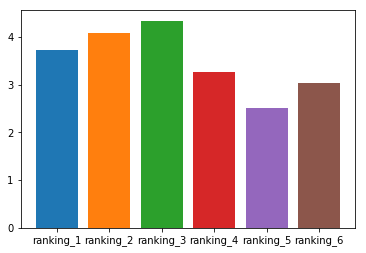

In [44]:
for ranking in ranking_names:
    plt.bar(ranking,star_wars[ranking].mean(),label=ranking)

plt.show()

In [45]:
seen

{'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode V The Empire Strikes Back': True,
 'Star Wars: Episode VI Return of the Jedi': True}

Since the lower the rank the better it is, Survey seems to indicate that the most liked movie is Star Wars: Episode V The Empire Strikes Back', followed by Star Wars: Episode VI Return of the Jedi and Star Wars: Episode IV  A New Hope.

Least liked movie is Star Wars: Episode III  Revenge of the Sith

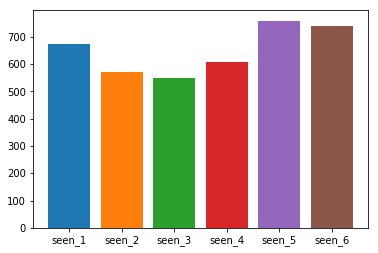

In [46]:
seen_names = get_column_names('seen_')

for name in seen_names:
    plt.bar(name,star_wars[name].sum())
    
plt.show()

Highest watched are Empire Strikes back and Return of the Jedi. No suprises there!

Phantom Menace is the third highest watched movie, followed by A New Hope

In [47]:
star_wars['gender'].value_counts()


Female    549
Male      497
Name: gender, dtype: int64

Dividing the dataframe based on Gender

In [48]:
male = star_wars[star_wars['gender']=='Male']
female = star_wars[star_wars['gender']=='Female']



In [49]:
male.head()

,respondentid,seen_bool,fan_bool,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,ranking_5,ranking_6,expanded_universe_aware,expanded_universe_fan,star_trek_fan,gender,age,household_income,education,location
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,5.0,6.0,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,False,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,5.0,6.0,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,4.0,3.0,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,1.0,3.0,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


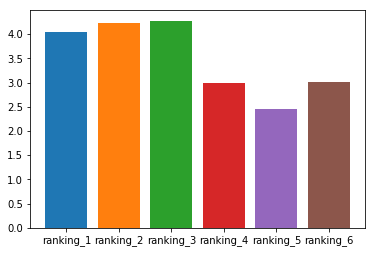

In [50]:
for name in ranking_names:
    plt.bar(name,male[name].mean())
plt.show()

Empire strikes back, Return of the Jedi and A new Hope are in top 3. Same as the overall trend

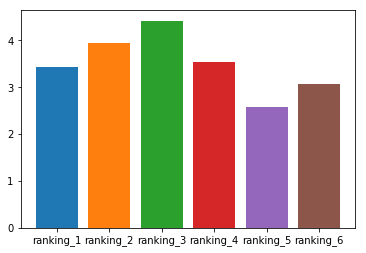

In [51]:
for name in ranking_names:
    plt.bar(name,female[name].mean())
plt.show()

Female fans have liked A new hope more than Return of the Jedi, whereas Male fans have given almost the same ranking for both.

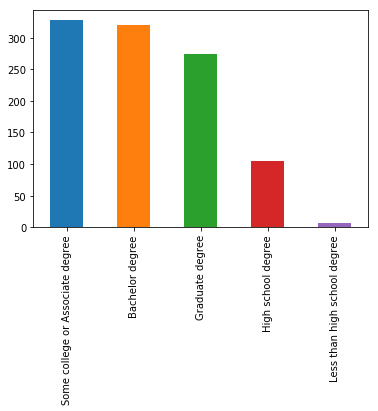

In [52]:
star_wars['education'].value_counts().plot.bar()

Majority of the Star Wars fans have at least Associate Degree or above

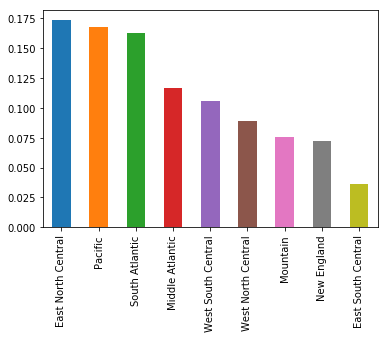

In [53]:
star_wars['location'].value_counts(normalize=True).plot.bar()

In [54]:
star_wars['location'].value_counts(normalize=True)

East North Central    0.173538
Pacific               0.167785
South Atlantic        0.162991
Middle Atlantic       0.116970
West South Central    0.105465
West North Central    0.089166
Mountain              0.075743
New England           0.071908
East South Central    0.036433
Name: location, dtype: float64

### 50% of the star wars audience are from below 3 regions.
-  East North Central    
-  Pacific               
-  South Atlantic        


In [55]:
star_wars['age'].value_counts(normalize=True)

45-60    0.278203
> 60     0.257170
30-44    0.256214
18-29    0.208413
Name: age, dtype: float64

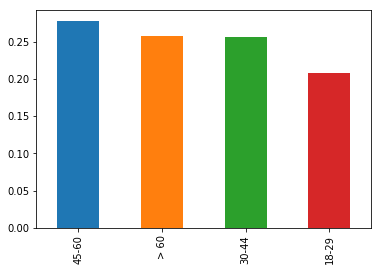

In [56]:
star_wars['age'].value_counts(normalize=True).plot.bar()

## Star Wars franchise is loved by all the age groups in the survey.